**Seeding for reproducibility**

In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing libraries**

In [ ]:
from tensorflow.keras import datasets , layers, models
import matplotlib.pyplot as plt

**Data curation**

In [ ]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Data Processing**

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
print(len(train_images))

60000


In [ ]:
print(len(train_labels))

60000


In [ ]:
print(train_images[0].shape)

(28, 28)


In [ ]:
print(type(train_images[0]))

<class 'numpy.ndarray'>


In [ ]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

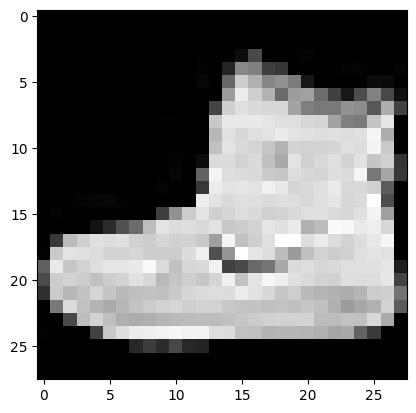

In [ ]:
#Dispaly an image from the dataset

plt.imshow(train_images[0], cmap='gray')
plt.show()

In [ ]:
print(train_labels[0])

9


**class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']**

In [ ]:
#normalize pixel value to between 0 and 1
train_images, test_images = train_images / 255, test_images / 255.0

In [ ]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [ ]:
#reshape images to specify that it's a single channel (grayscale)

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
print(train_images.shape)

(60000, 28, 28, 1)


In [ ]:
print(test_images.shape)

(10000, 28, 28, 1)


**Convolutional Neural Network**

In [ ]:
#Build the convolutional base

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

#Add dense layer on the top

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compliling and train the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Model Training**

In [ ]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 33ms/step - accuracy: 0.7483 - loss: 0.6959 - val_accuracy: 0.8677 - val_loss: 0.3658
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.8776 - loss: 0.3373 - val_accuracy: 0.8869 - val_loss: 0.3185
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 34ms/step - accuracy: 0.8967 - loss: 0.2833 - val_accuracy: 0.8920 - val_loss: 0.2962
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9088 - loss: 0.2474 - val_accuracy: 0.8975 - val_loss: 0.2877
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9172 - loss: 0.2211 - val_accuracy: 0.8996 - val_loss: 0.2816


Model Evaluation

In [ ]:
#evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\ntest_accuracy: ', test_acc)

313/313 - 4s - 12ms/step - accuracy: 0.8996 - loss: 0.2816

test_accuracy:  0.8996000289916992


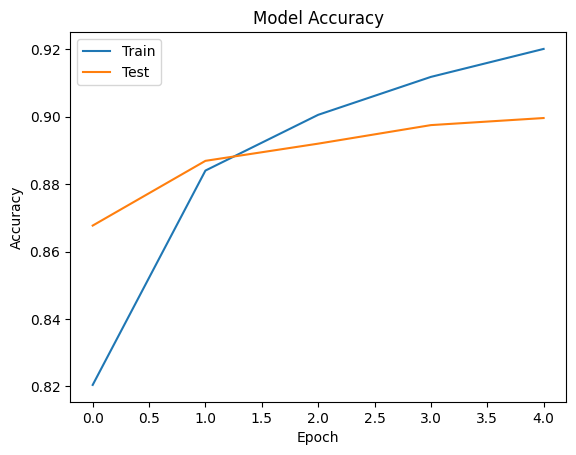

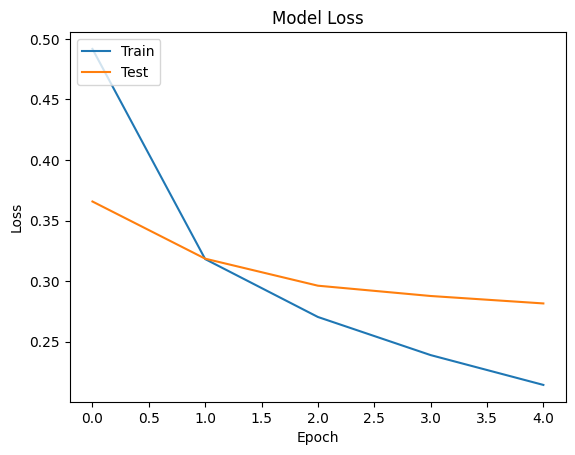

In [ ]:
#plot training and validationa ccuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training and validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#saving model

model.save('trained_fashion_mnist_model.h5')